# Assembled inductor measurements

* Configure sweep 50kHz .. 100Mhz or whatever range intended for practical use
* Callibrate the VNA with the testing fixture (notice, short and load standards in the bottom left of the photo)
* Setup the inductor in the testing fixture
* Run nano-VNA, record measurements into *.s1p file (Touchstone file format)
* Process raw data with the script below

<img src="fixture-b.jpg" width="400">


Reactance (in our case, inductance)

$X = Z_{imag} * \frac{1}{2*\pi*f}$

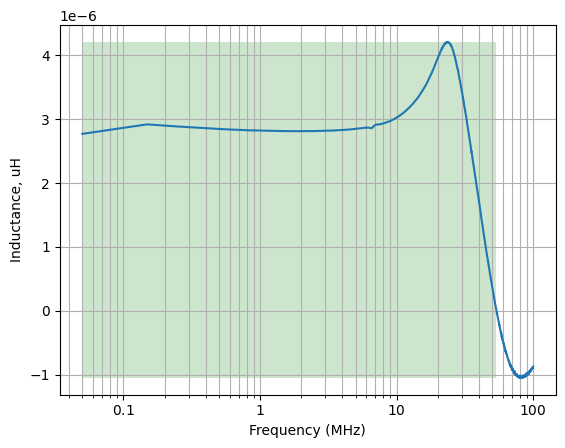

In [2]:
import matplotlib.pyplot as plt
import matplotlib.collections as collections
import skrf as rf
import numpy
import math

file1='inductor-sweep.s1p'

nw1=rf.Network(file1)

plt.figure()
plt.xscale('log')
plt.rcParams['axes.formatter.min_exponent'] = 4
plt.grid(True, which="both")
freqs = nw1.f/1000000
values = nw1.z[:,0,0].imag/(2*numpy.pi*nw1.f)
plt.plot(freqs, values)
plt.ylabel('Inductance, uH')
plt.xlabel('Frequency (MHz)')

collection = collections.BrokenBarHCollection.span_where(
    freqs, ymin=min(values), ymax=max(values), where= values > 0, facecolor='green', alpha=0.2)
plt.gca().add_collection(collection)

plt.show()

Notice that around 55Mhz the inductor turns into a capacitor

## Q factor

$Q= \frac{X}{R}$

Notice that in this case, R is a really small nuber. So noise in measurements make Q graphs jitter and spike. 

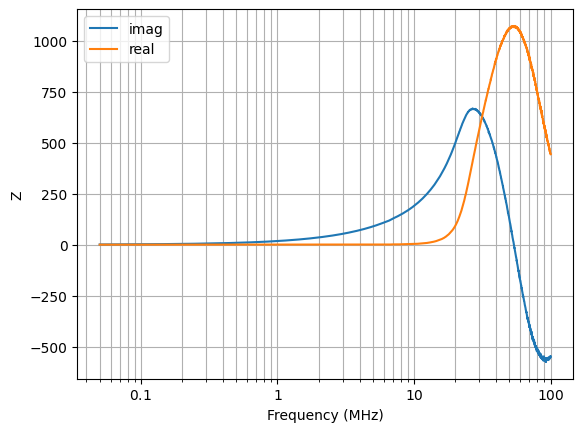

In [8]:
plt.figure()
plt.xscale('log')
plt.rcParams['axes.formatter.min_exponent'] = 4
plt.grid(True, which="both")
freqs = nw1.f/1000000
plt.plot(freqs, nw1.z[:,0,0].imag, label="imag")
plt.plot(freqs, nw1.z[:,0,0].real, label="real")
plt.legend()
plt.ylabel('Z')
plt.xlabel('Frequency (MHz)')

plt.show()

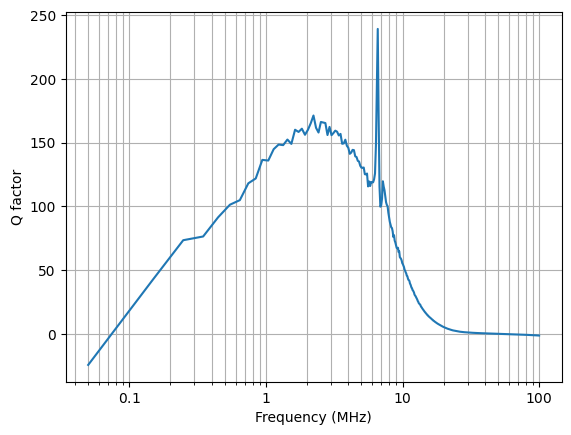

In [4]:
plt.figure()
plt.xscale('log')
plt.rcParams['axes.formatter.min_exponent'] = 4
plt.grid(True, which="both")
freqs = nw1.f/1000000
values = nw1.z[:,0,0].imag/nw1.z[:,0,0].real
plt.plot(freqs, values)
plt.ylabel('Q factor')
plt.xlabel('Frequency (MHz)')

plt.show()